In [1]:
path = '/content/drive/MyDrive/HACKATHON/'

In [2]:
import pandas as pd
import numpy as np
# import torch
# import csv

In [4]:
cities = pd.read_csv(f'{path}cities.csv',index_col='id')
districts = pd.read_csv(f'{path}districts.csv',index_col='id')
# test = pd.read_csv(f'{path}test.csv', on_bad_lines='skip')
train = pd.read_csv(f'{path}train.csv')
train.shape
# train_desc = pd.read_csv(f'{path}train_description_clean.csv')
# test_desc = pd.read_csv(f'{path}test_description_clean.csv')

(832011, 11)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print("### INFO ###")
print(cities.info())
print("### HEAD ###")
print(cities.head())
print("### NaN ###")
print(cities.isnull().sum(axis = 0))

In [ ]:
print("### INFO ###")
print(districts.info())
print("### HEAD ###")
print(districts.head())
print("### NaN ###")
print(districts.isnull().sum(axis = 0))

In [ ]:
print("### INFO ###")
print(test.info())
print("### HEAD ###")
print(test.head())


### INFO ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5426 entries, 0 to 5425
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5426 non-null   int64  
 1   created_at_first  5426 non-null   object 
 2   category          5426 non-null   object 
 3   is_business       5425 non-null   float64
 4   district_id       3460 non-null   float64
 5   city_id           5425 non-null   float64
 6   region_id         5425 non-null   float64
 7   description       5425 non-null   object 
 8   params            5425 non-null   object 
 9   title             4785 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 424.0+ KB
None
### HEAD ###
       id     created_at_first                category  is_business  \
0  514606  2019-04-04 15:58:45  Mieszkanie na sprzedaż          1.0   
1  340281  2019-05-17 11:11:16  Mieszkanie na sprzedaż          1.0   
2  713770  2019-04-05

In [ ]:
print("### INFO ###")
print(train.info())
print("### HEAD ###")
print(train.head())


### INFO ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4861 non-null   int64  
 1   created_at_first  4861 non-null   object 
 2   category          4861 non-null   object 
 3   is_business       4861 non-null   int64  
 4   district_id       2834 non-null   float64
 5   city_id           4861 non-null   int64  
 6   region_id         4861 non-null   int64  
 7   description       4861 non-null   object 
 8   params            4861 non-null   object 
 9   title             4203 non-null   object 
 10  price             4860 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 417.9+ KB
None
### HEAD ###
       id     created_at_first                category  is_business  \
0  325017  2018-10-06 12:20:48  Mieszkanie na sprzedaż            1   
1  513427  2019-02-18 12:17:51  Mieszkanie na

In [ ]:
print("### NaN ###")
print(test.isnull().sum(axis = 0))
print("### NaN ###")
print(train.isnull().sum(axis = 0))

### NaN ###
id                     0
created_at_first       0
category               0
is_business            1
district_id         1966
city_id                1
region_id              1
description            1
params                 1
title                641
dtype: int64
### NaN ###
id                     0
created_at_first       0
category               0
is_business            0
district_id         2027
city_id                0
region_id              0
description            0
params                 0
title                658
price                  1
dtype: int64


In [5]:
from tqdm.notebook import tqdm

def is_apartment(data):
  return data['category'] == 'Mieszkanie na sprzedaż'

def get_city_geoloc(city_id):
  return cities.loc[city_id][['lon','lat']]

def get_district_geoloc(district_id):
  return districts.loc[district_id][['lon','lat']]

def drop_region_id(data):
  return data.drop('region_id',1)

def drop_id(data):
  return data.drop('id',1)

def get_x_y(data):
  return data.loc[:, data.columns != 'price'], data.loc[:, data.columns == 'price']

def get_geoloc(data):
  if not data['district_id']:
    return get_district_geoloc(int(data['district_id']))
  elif data['city_id']:
    return get_city_geoloc(int(data['city_id']))

def price_per_m(data):
  data['pln/m'] = data['price']/data['m']

def super_funkcja_eryka(params, params_all):
  result = [] 
  for param in params_all: 
    if param in params:
      result.append(1)
    else:
      result.append(0)
  return result

def sef(data):
  lon_ = []
  lat_ = []
  for i, row in tqdm(data.iterrows()):
      lon, lat= get_geoloc(row)
      lon_.append(lon)
      lat_.append(lat)
  data['lon']=lon_
  data['lat']=lat_


In [ ]:
test[test['district_id'].isnull()]

,id,created_at_first,category,is_business,district_id,city_id,region_id,description,params,title
1,340281,2019-05-17 11:11:16,Mieszkanie na sprzedaż,1.0,NaN,940.0,7.0,<p>3 POKOJE.. OGRÓDEK.. BALKON.. 2 MIEJSCA POS...,price[currency]<=>PLN<br>m<=>75<br>rooms_num<=...,NaN
3,250604,2019-04-12 16:41:14,Dom na sprzedaż,1.0,NaN,19340.0,15.0,"<p>Polecam do sprzedaży wolnostojący dom, poło...",price[currency]<=>PLN<br>terrain_area<=>9583<b...,Dom parterowy pod Poznaniem
5,80388,2019-04-14 13:14:02,Dom na sprzedaż,0.0,NaN,825.0,7.0,<p>Budynek oddany w 2013 r<br /> <br /> 707 m2...,price[currency]<=>PLN<br>terrain_area<=>707<br...,Dom mieszkalny (2013) | m2 | Słupno
10,571296,2019-05-29 14:48:20,Dom na sprzedaż,1.0,NaN,11536.0,15.0,<p>Zachęcam do zapoznania się z ofertą sprzeda...,price[currency]<=>PLN<br>terrain_area<=>386<br...,"Nowy bliźniak, duży ogród, blisko Szkoły!"
23,297896,2019-06-26 11:22:40,Mieszkanie na sprzedaż,1.0,NaN,169.0,12.0,"<p>Dwupokojowe w bloku<br />- kuchnia, <br />-...",price[currency]<=>PLN<br>m<=>43<br>rooms_num<=...,Dwupokojowe-Ruda Południowa
...,...,...,...,...,...,...,...,...,...,...
5416,508371,2019-06-04 15:45:10,Dom na sprzedaż,1.0,NaN,207.0,11.0,<p>WYGODNY DOM W DOBREJ CENIE !! <br /><br /><...,price[currency]<=>PLN<br>terrain_area<=>500<br...,Promocyjna Cena !! Bolesławice / 5 pokoi
5417,150465,2019-05-21 22:20:37,Dom na sprzedaż,1.0,NaN,569.0,6.0,<p></p><p><br/><strong>PIĘKNY NOWOCZESNY DOM Z...,price[currency]<=>PLN<br>terrain_area<=>600<br...,NaN
5418,385110,2019-04-05 17:10:54,Dom na sprzedaż,1.0,NaN,2496.0,2.0,<p><strong>Sprzedam nowy dom z 2019 roku z dzi...,price[currency]<=>PLN<br>terrain_area<=>1029<b...,Sprzedam nowy dom za <PRICE> !!!
5421,232580,2019-05-22 22:15:27,Mieszkanie na sprzedaż,1.0,NaN,1305.0,1.0,<p><br/><strong>Dwupokojowe mieszkanie w Jedli...,price[currency]<=>PLN<br>m<=>64.22<br>rooms_nu...,NaN


In [ ]:
from collections import defaultdict
from tqdm import tqdm

def append_meters(data: pd.DataFrame) -> pd.DataFrame:
    params_tab = []
    for p in tqdm(data.params):
        params = defaultdict(lambda: [])
        res = [_p.split('<=>') for _p in p.split('<br>')]
        m = [t[1] for t in res if len(t) == 2 and t[0] == 'm']
        params_tab.append(m)
    params_tab = pd.DataFrame(data={'m': params_tab})
    params_tab.m = params_tab.m.map(lambda x: float(x[0]))
    
    return pd.concat([data, params_tab], axis=1)

train_meters = append_meters(train)
# train_meters.head()

100%|██████████| 832011/832011 [00:12<00:00, 66000.52it/s]


In [7]:
## BEFORE RUN THIS CELL CREATE REQUIRED FILES VIA THE OTHER NOTEBOOK !
ttrain = train[['price', 'category', 'city_id', 'district_id']]  # , 'city_id', 'is_business', 'category'
sef(ttrain)
ttrain = ttrain.drop(columns=['city_id', 'district_id'])
category = is_apartment(ttrain)
# ttrain = ttrain.drop(columns=['category'])
ttrain['category'] = category

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer


ttrain = pd.read_csv(path+'ttrain.csv')
TRAIN_PARAMS_NAME = "train_params_df.csv"

train_data = pd.read_csv(path+TRAIN_PARAMS_NAME).fillna(method='pad', axis=1).drop(columns=['security_types',
                    'extras_types','garret_type','fence_types','media_types','heating_types','other','type',
                    'deposit', 'deposit[currency]', 'rent_to_students','access_types'])

train_data = pd.concat([ttrain, train_data], axis=1)
# Price per squared meter
# price_per_m(train_data)
# train_data = train_data.drop(columns='price')
# print(train_data["pln/m"].head())
# train_data = train_data[(train_data["pln/m"]>=2000) & (train_data["pln/m"]<=20000)]
# X, Y = train_data.loc[:, train_data.columns != 'pln/m'], train_data.loc[:, train_data.columns == 'pln/m']
train_data = train_data[(train_data["price"]>=80_000) & (train_data["price"]<=2_000_000)]
X, Y = get_x_y(train_data)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3
)

In [7]:
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb

param_grid = [
    {
        # "criterion": ["absolute_error"],
        "max_depth": [3, 5], # 1, 5, 7],
        "loss": ["huber"],
        "min_samples_leaf": [1, 40], # , 5, 10],
        "n_estimators": [50, 100]
    },
]

for params in (1,):  # ParameterGrid(param_grid)
    model1 = RandomForestRegressor(n_estimators=30, max_depth=93, min_samples_leaf=50, n_jobs=-1, criterion='squared_error')

    model1.fit(X_train, Y_train)

    pred = model1.predict(X_test)
    score = mean_squared_error(Y_test, pred)
    print("RMSE: ", sqrt(score))
    print("RMSE train: ", sqrt(mean_squared_error(Y_train, model1.predict(X_train))))
    print("score: ", mean_absolute_error(Y_test, pred))
    print("score %: ", mean_absolute_percentage_error(Y_test, pred))
    print("=========================")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE:  126246.17797137662
RMSE train:  121436.54682412154
score:  70189.28057109957
score %:  0.16712671093929482


In [ ]:
test = pd.read_csv(f'{path}test.csv', on_bad_lines='skip')
ttrain = test[['price', 'category', 'city_id', 'district_id']]  # , 'city_id', 'is_business', 'category'
sef(ttrain)
ttrain = ttrain.drop(columns=['city_id', 'district_id'])
category = is_apartment(ttrain)
ttrain['category'] = category

TEST_PARAMS_NAME = "test_params_df.csv"
test_data = pd.read_csv(path+TEST_PARAMS_NAME).fillna(method='pad', axis=1).drop(columns=['security_types',
                    'extras_types','garret_type','fence_types','media_types','heating_types','other','type',
                    'deposit', 'deposit[currency]', 'rent_to_students','access_types'])

test_data = pd.concat([ttrain, test_data], axis=1)
y_test_predicted = model1.predict(test_data)
np.savetxt(path+'test_results.csv', y_test_predicted, delimeter=',')

In [ ]:
# model = VotingRegressor(estimators=[
    #                                     ('knn', KNeighborsRegressor()),
    #                                     ('grad', GradientBoostingRegressor()),
    #                                     ('rand', RandomForestRegressor(max_depth=93, n_estimators=30, min_samples_leaf=50)),
    #                                     ('mlp', MLPRegressor(hidden_layer_sizes=(15, 30, 15), max_iter=50))
    # ])
    # model = make_pipeline(StandardScaler(), LinearSVR())
    # model1 = KNeighborsRegressor()
    # model2 = KNeighborsRegressor()
    # print(params)
    # X_test_c1, X_test_c2 = X_test[X_test['category']], X_test[~X_test['category']]
    # pred1, pred2 = model1.predict(X_test_c1), model2.predict(X_test_c2)
    # p = np.concatenate([pred1, pred2], 0)
    # pred = model.predict(X_test)
    # model2 = RandomForestRegressor(n_estimators=30, max_depth=93, min_samples_leaf=50, n_jobs=-1, criterion='squared_error')
    # X_train_small, Y_train_small = X_train[X_train['category']], Y_train[X_train['category']]
    # X_train_big, Y_train_big = X_train[~X_train['category']], Y_train[~X_train['category']]
    # model2.fit(X_train_big, Y_train_big)
    # pred2 = model2.predict(X_test)
    # pred_mask = pred <= 800_000
    # pred2_mask = pred2 >= 800_000
    # for i, (p, p2, m, m2) in enumerate(zip(pred, pred2, pred_mask, pred2_mask)):
    #     # if m and not m2:
    #     #     pred[i] = p
    #     if not m and m2:
    #         pred[i] = p2
    #     # else:
    #     #     pred[i] = p

In [27]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
score = mean_squared_error(Y_test, pred)
print("RMSE: ", sqrt(score))
print("RMSE train: ", sqrt(mean_squared_error(Y_train, knn.predict(X_train))))
print("score: ", mean_absolute_error(Y_test, pred))
print("score %: ", mean_absolute_percentage_error(Y_test, pred))
print("=========================")

KeyboardInterrupt: ignored

In [26]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
score = mean_squared_error(Y_test, pred)
print("RMSE: ", sqrt(score))
print("RMSE train: ", sqrt(mean_squared_error(Y_train, model.predict(X_train))))
print("score: ", mean_absolute_error(Y_test, pred))
print("score %: ", mean_absolute_percentage_error(Y_test, pred))
print("=========================")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE:  146658.37022234494
RMSE train:  147040.81335627256
score:  88682.4883822952
score %:  0.22863913846608447


price    80000
dtype: int64 price    2000000
dtype: int64 price    421685.187422
dtype: float64 price    274626.159838
dtype: float64 price    350000.0
dtype: float64
small:  0.0
big:  0.0
273549.18134407327


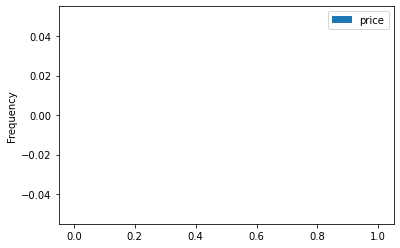

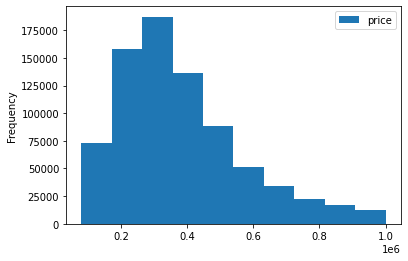

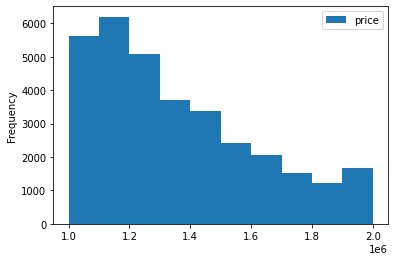

In [28]:
print(Y.min(), Y.max(), Y.mean(), np.std(Y), Y.median())

p_name = 'price'  # 'pln/m'
sm = Y[Y[p_name]<80000]
print('small: ', sm.shape[0]/Y.shape[0])
print('big: ', Y[Y[p_name]>2_000_000].shape[0]/Y.shape[0])
Y[Y<10000].plot.hist()
th2 = 1_000_000
Y[(th2>Y)&(Y>80000)].plot.hist()
Y[(Y>th2)&(Y<th2*5)].plot.hist()
print(sqrt(mean_squared_error(Y_test, [Y_train.mean()]*Y_test.shape[0])))

In [8]:
# NEURAL NETWORK
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import tensorflow as tf

In [ ]:
x = X.drop(columns=['Unnamed: 0'])


x['category'] = x['category'].astype(float)
print(X.shape[1])
print(x.shape[1])
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'RSE-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_model.fit( x, Y , epochs=500, batch_size=1024,verbose=1,validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
train_data = train_data.drop(columns=['Unnamed: 0'])
train_data['category'] = train_data['category'].astype(float)
corr = train_data.corr()
plt.figure(figsize=(21,22))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)